In [20]:
import numpy as np
import vtk
from vtk.util import numpy_support as nps
import sys

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
%config InlineBackend.figure_format = 'retina'

In [21]:
base_path = 'AdvectionDiffusion/right/asi2/p1/RT1/'
f_name = 'int_r.dat'

In [22]:
SPINE_COLOR = 'gray'
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              #'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

In [23]:
latexify()

Read in the int_r.dat file 

In [3]:
xs, ys = [], []
with open(base_path + f_name) as f: 
    for line in f: 
        a, b = line.split()
        xs.append(int(a))
        ys.append(float(b))

        

Text(0.5,1,'AdvectionDiffusion/right/asi2/p1/RT1/int_r.dat')

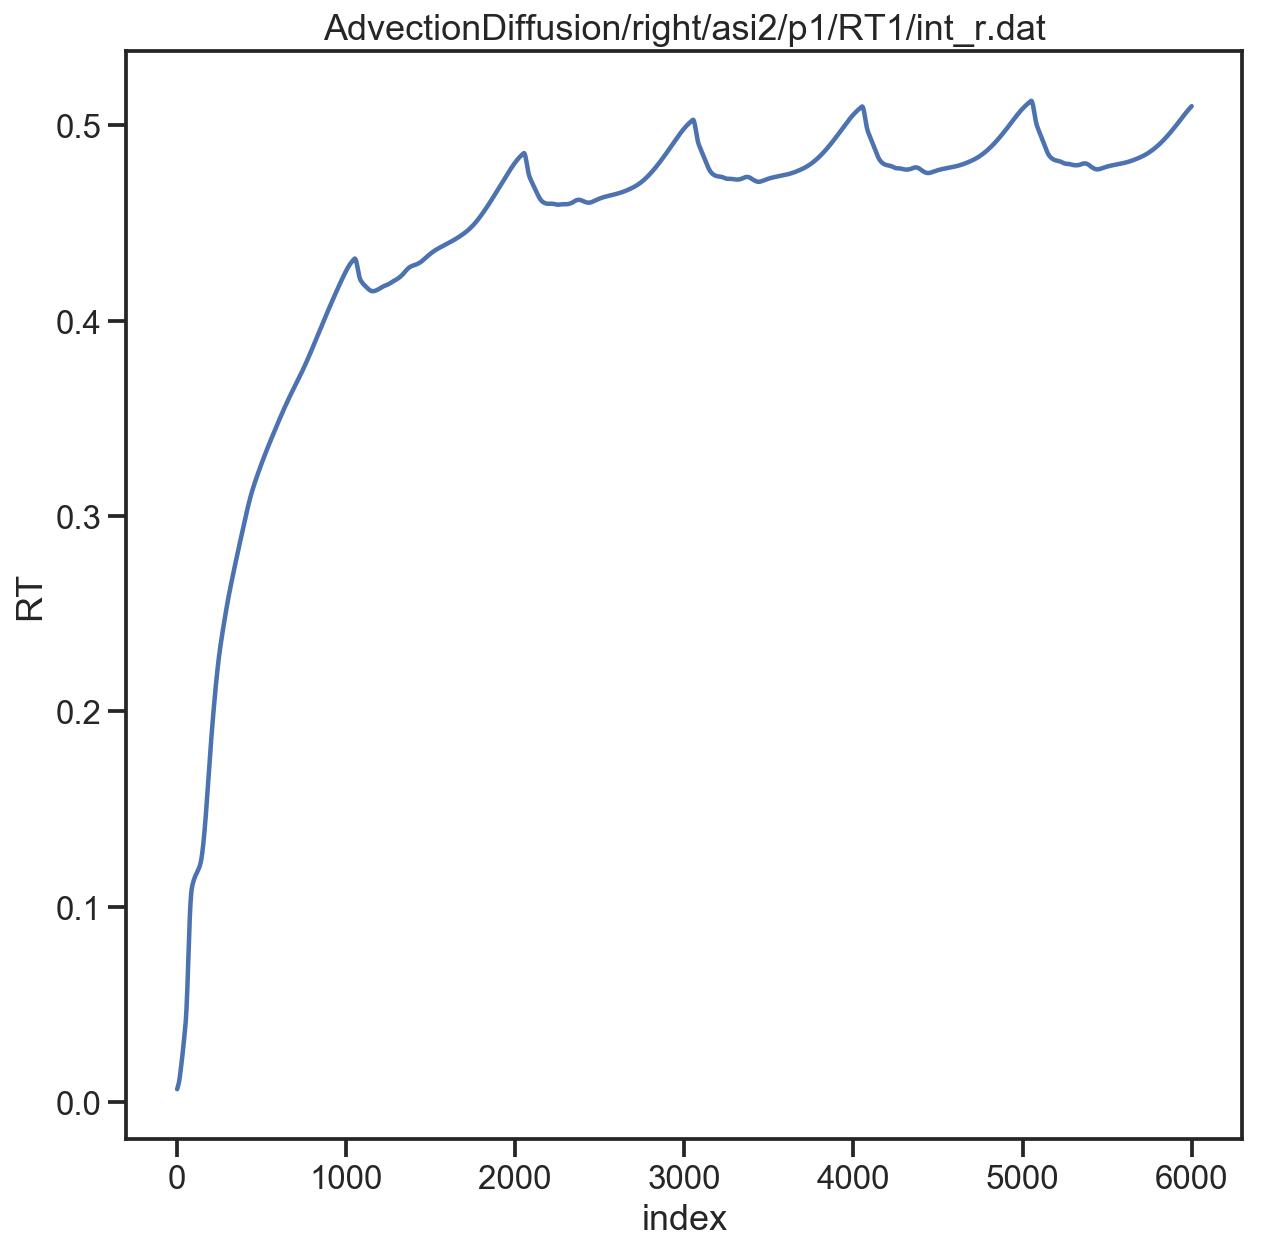

In [4]:
plt.figure(figsize=(10,10))

plt.plot(xs, ys)
plt.xlabel('index')
plt.ylabel('RT')
plt.title(base_path + f_name)

In [35]:
dt = 0.000811
cycle_time = dt*1000
right_residence_times = {
    'ASI2': {'prox':[.2214,  0.36337, 0.51839, 0.73986, 1.0446],
             'med' :[0.29585, 0.42878,  0.57607 , 0.80149, 1.1435],
             'dist':[.59844, 0.71051, 0.95027, 1.2456, 2.2204]},
    'ASI4': {'prox':[.49766, 0.79491, 1.1573, 1.5185, 2.3435]},
    'ASI6': {'prox':[.52155, 0.99527, 1.2981, 1.6884, 2.3579]}
}

right_volumes = {
    'ASI2': {'prox':[0.37912, 0.48379, 0.68129, 0.88389, 1.1165],
             'med': [0.2626, 0.40586, 0.58183, 0.80693, 0.94628], 
             'dist': [.19253, 0.30718, .45923, .65179, .89421]}, 
    'ASI4': {'prox':[0.90235, 1.3218, 1.9063, 2.5823, 2.8892]},
    'ASI6': {'prox':[1.4014, 1.4651, 2.109, 2.9514, 4.0107]},
}

baseline_residence_times = {
    'ASI2': 0.06204,
    'ASI4': 0.086032,
    'ASI6': 0.11363,
}
baseline_volumes = {
    'ASI2': 0.24673,
    'ASI4': 0.56148,
    'ASI6': 0.25788
}

z_scores = ['p1', 'p2', 'p3', 'p4', 'p5']

plotted_z_scores = {
    'p1': 6,
    'p2': 8,
    'p3': 10,
    'p4': 12, 
    'p5': 14,
}
plotted_shapes = ['ASI2', 'ASI4', 'ASI6']

RT vs Shape Index, Prox RCA, stratified by Z-score

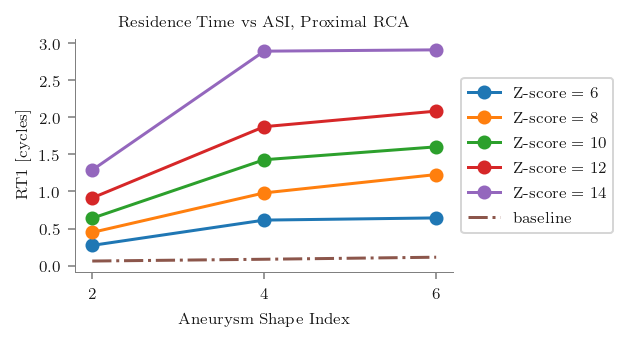

0.811


In [43]:
fig = plt.figure()#figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
format_axes(ax)
cur_pos = 'prox'

for z, size in enumerate(z_scores):
    res_times = np.zeros((len(plotted_shapes), len(z_scores)))
    for a, shape in enumerate(plotted_shapes): 
        res_times[a, z] = right_residence_times[shape][cur_pos][z]
    ax.plot([2, 4, 6], res_times[:,z]/cycle_time, label = 'Z-score = ' + str(plotted_z_scores[size]), marker='o')
        
        
        
ax.plot([2, 4, 6], [baseline_residence_times[shape] for shape in plotted_shapes], label='baseline', linestyle='-.')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Aneurysm Shape Index')
plt.xticks([2, 4, 6])
ax.set_ylabel('RT1 [cycles]')
plt.title('Residence Time vs ASI, Proximal RCA')
plt.savefig("../figures/RT_shape.eps", bbox_inches='tight')
plt.show()

print cycle_time

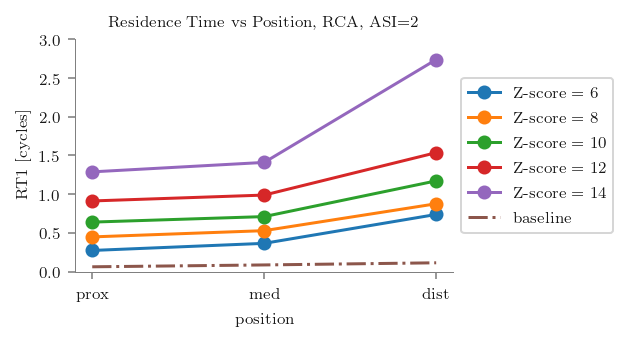

In [44]:
fig = plt.figure()#figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
format_axes(ax)
cur_shape = 'ASI2'
positions =  ['prox', 'med', 'dist']

for z, size in enumerate(z_scores):
    res_times = np.zeros((len(plotted_shapes), len(z_scores)))
    for a, pos in enumerate(positions): 
        res_times[a, z] = right_residence_times[cur_shape][pos][z]
    ax.plot(positions, res_times[:,z]/cycle_time, label = 'Z-score = ' + str(plotted_z_scores[size]), marker='o')
        
        
        
ax.plot(positions, [baseline_residence_times[shape] for shape in plotted_shapes], label='baseline', linestyle='-.')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
#plt.legend()
plt.xlabel('position')
plt.ylabel('RT1 [cycles]')
ax.set_ylim([0, 3])
plt.title('Residence Time vs Position, RCA, ASI=2')
plt.savefig("../figures/RT_pos.eps", bbox_inches='tight')
plt.show()

Volume plot 

[0.37912, 0.48379, 0.68129, 0.88389, 1.1165, 0.2626, 0.40586, 0.58183, 0.80693, 1.0183, 0.19253, 0.30718, 0.45923, 0.65179, 0.89421, 0.90235, 1.3218, 1.9063, 2.5823, 2.8892, 1.4014, 1.4651, 2.109, 2.9514, 4.0107]


Text(0.5,1,'Residence Time vs Aneurysm Volume, Aggregated')

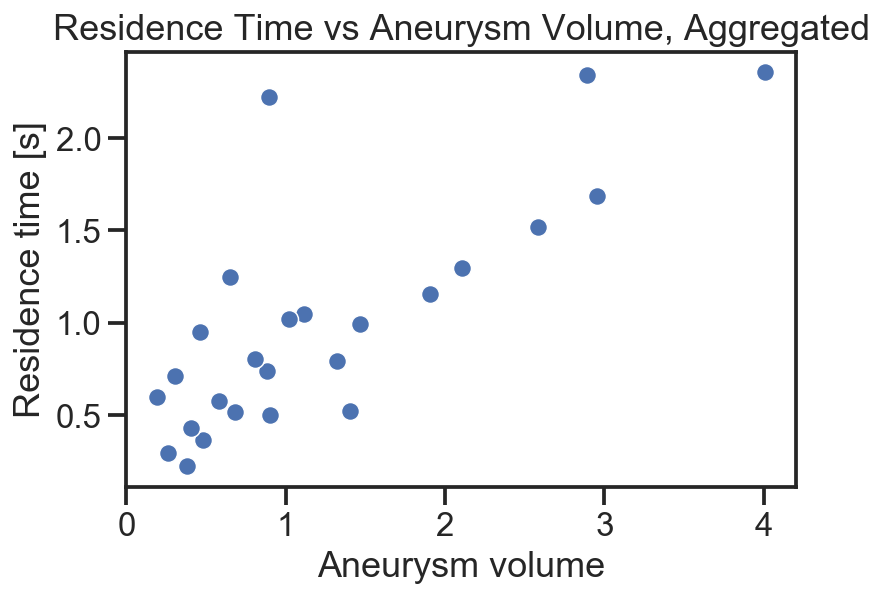

In [8]:
RTs = []
vols = []
shapes = ['ASI2', 'ASI4', 'ASI6']
positions = ['prox', 'med', 'dist']

for shape in shapes: 
    for position in positions: 
        if position in right_volumes[shape].keys():
            vols += right_volumes[shape][position]
            RTs += right_residence_times[shape][position]
        

# for longform, data_dict in zip([RTs, vols], [right_residence_times, right_volumes]):
#     for position in positions: 
#         for shape in plotted_shapes: 
#             if position in data_dict.keys(): longform += data_dict[shape]
        

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

print vols
sns.scatterplot(vols, RTs)
plt.xlabel('Aneurysm volume')
plt.ylabel('Residence time [s]')
plt.title('Residence Time vs Aneurysm Volume, Aggregated')

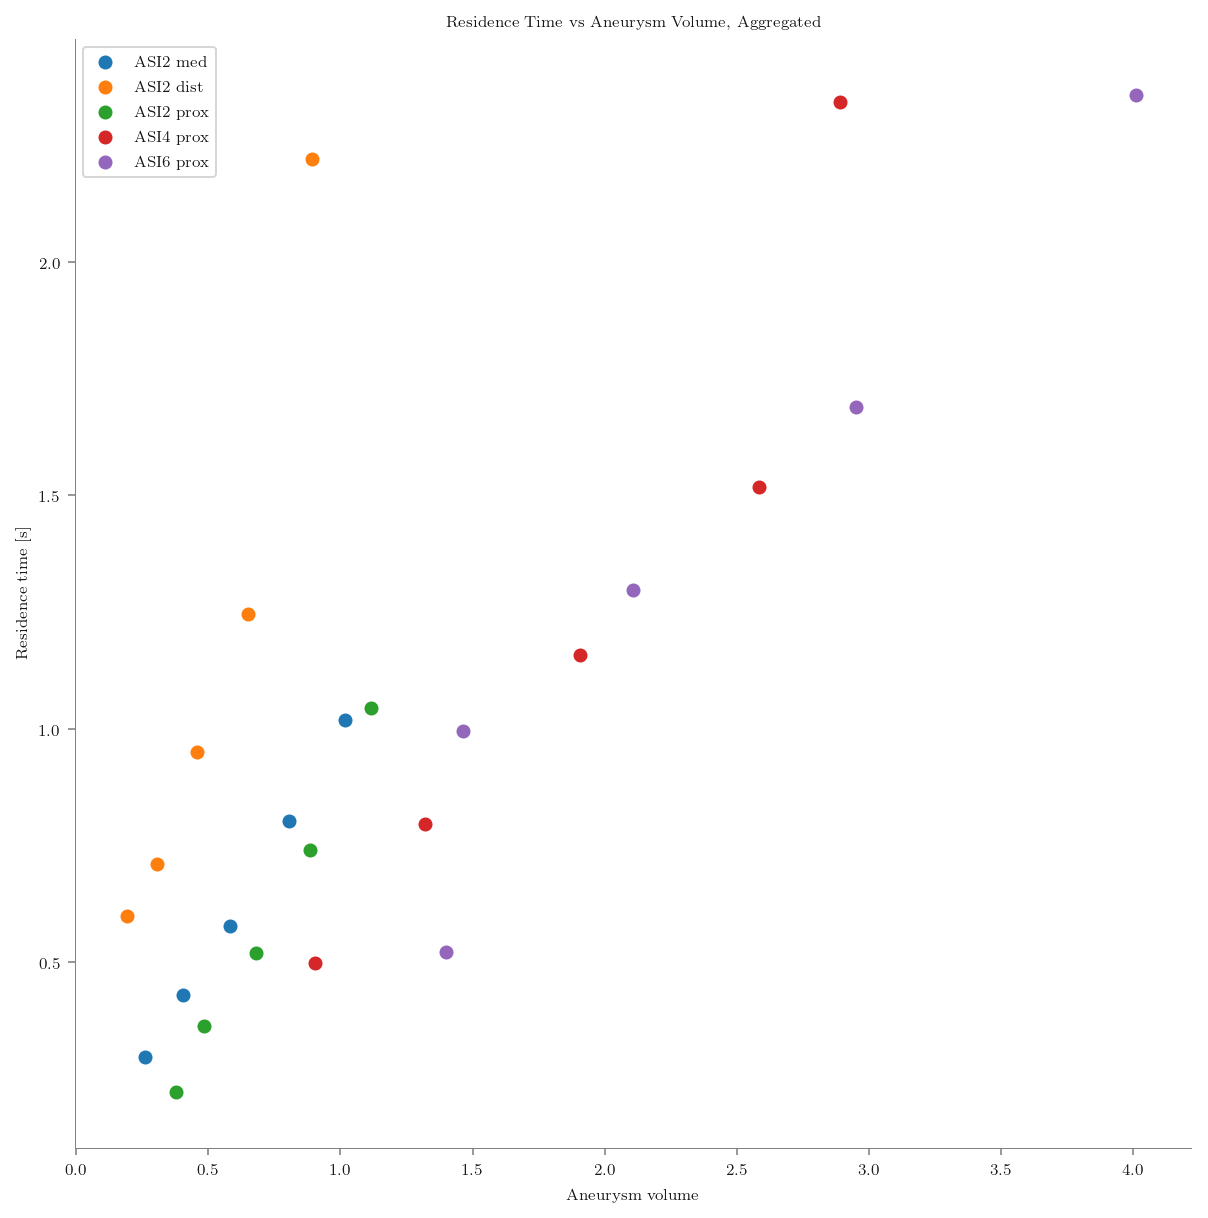

In [29]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
format_axes(ax)

for shape in shapes: 
    for position in right_volumes[shape].keys(): 
        ax.scatter(right_volumes[shape][position], right_residence_times[shape][position], 
                   label=' '.join([shape, position]))
        
plt.xlabel('Aneurysm volume')
plt.ylabel('Residence time [s]')
plt.legend()
plt.title('Residence Time vs Aneurysm Volume, Aggregated')
plt.savefig("../figures/RT_vol.eps", bbox_inches="tight")